In [1]:
import numpy as np
import celmech as cm
import sympy as sp

In [2]:
from matplotlib import pyplot as plt

In [3]:
pR,pz = cm.get_symbol(r"p_R",real=True),cm.get_symbol(r"p_z",real=True)
alpha,gamma = sp.symbols("alpha,gamma",real=True)
z,lmbda,mu= sp.symbols("z,lambda,mu",real=True)
R=sp.symbols("R",positive=True)
eqs=[
    R*R - (lmbda + alpha) * (mu + alpha) / (alpha-gamma),
    z*z - (lmbda + gamma) * (mu + gamma) / (gamma-alpha)
]
lmbda_of_Rz,mu_of_Rz = sp.solve(eqs,lmbda,mu)[1]

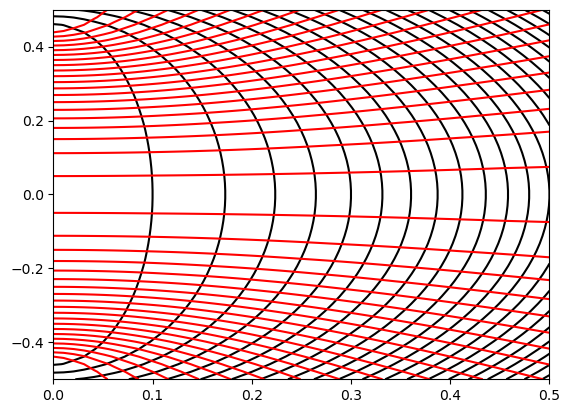

In [4]:
fn = sp.lambdify((R,z,alpha,gamma),lmbda_of_Rz)
X,Y=np.meshgrid(np.linspace(0,0.5),np.linspace(-0.5,0.5))
Z=fn(X,Y,-0.25,-0.25*(1-0.9**2))
plt.contour(X,Y,Z,20,colors='k')
fn = sp.lambdify((R,z,alpha,gamma),mu_of_Rz)
X,Y=np.meshgrid(np.linspace(0,0.5),np.linspace(-0.5,0.5))
Z=fn(X,Y,-0.25,-0.25*(1-0.9**2))
plt.contour(X,Y,Z,20,colors='r')

In [7]:
pLmbda_of_Rz = sp.diff(lmbda_of_Rz,R)*pR + sp.diff(lmbda_of_Rz,z)*pz  
pMu_of_Rz = sp.diff(mu_of_Rz,R)*pR + sp.diff(mu_of_Rz,z)*pz  

In cylindrical coordinates

In [6]:
ell_2_polar = dict(zip(
    [lmbda,mu,plambda,pmu],
    [lmbda_of_Rz,mu_of_Rz,pLmbda_of_Rz,pMu_of_Rz]
))

NameError: name 'plambda' is not defined

In [ ]:
L=sp.symbols("L")
T = pR*pR/2 + pz*pz/2 + L*L/R/R/2
V = sp.sqrt(lmbda+gamma) * sp.atan(sp.sqrt((lmbda+gamma)/(-gamma)))
V += -1 * sp.sqrt(mu+gamma) * sp.atan(sp.sqrt((mu+gamma)/(-gamma))) 
V *= -1*2 * sp.pi *(-alpha*sp.sqrt(-gamma)) / (lmbda - mu)
T+V
# A = - alpha - gamma + R*R + z*z
# B = alpha*gamma - gamma*R*R - alpha * z*z
# lmbda_soln = sp.simplify((A + sp.sqrt(A*A - 4*B ))/2)
# mu_soln = sp.simplify((A - sp.sqrt(A*A - 4*B ))/2)
# ell_2_polar = {lmbda:lmbda_soln,mu:mu_soln}
Vpolar = sp.simplify(V.xreplace(ell_2_polar))

In [ ]:
a = 1
e = 0.9
pars_rule={alpha:-1*a*a,gamma:-1*a*a*(1-e*e)}

V_contour_fn=sp.lambdify([R,z],Vpolar.xreplace(ell_2_polar).xreplace(pars_rule))
X,Y=np.meshgrid(np.linspace(0,0.5),np.linspace(-0.5,0.5))
plt.contour(X,Y,V_contour_fn(X,Y),20,colors='k')

In [ ]:
dVdR=sp.simplify(sp.diff(V.xreplace({mu:-gamma}).xreplace(ell_2_polar),R).xreplace({z:0}))
dVdR_func=sp.lambdify([R],dVdR.xreplace(pars_rule))

In [ ]:
plt.plot(np.linspace(0,4),np.sqrt((np.linspace(0,4))**3 * dVdR_func(np.linspace(0,4)))/np.linspace(0,4))
plt.xlabel("$R$",fontsize=15)
plt.ylabel(r"$v_c$",fontsize=15)

In [121]:
Ham = T+Vpolar
Ham

                     ⎛                                                                              
                     ⎜                                                                              
                     ⎜                                                                              
                     ⎜      ________________________________________________________________________
                     ⎜     ╱                      __________________________________________________
                ____ ⎜    ╱   2            2     ╱  4      2        2        2  2    2              
  2    √2⋅π⋅α⋅╲╱ -γ ⋅⎜- ╲╱   R  - α + γ + z  - ╲╱  R  - 2⋅R ⋅α + 2⋅R ⋅γ + 2⋅R ⋅z  + α  - 2⋅α⋅γ + 2⋅α
 L                   ⎝                                                                              
──── + ─────────────────────────────────────────────────────────────────────────────────────────────
   2                                                                                       

In [122]:
R0 = 2
pars_rule.update({L:np.sqrt(R0**3 * dVdR_func(R0))})
pars_rule


{L: 2.2171586515042128, α: -1, γ: -0.18999999999999995}

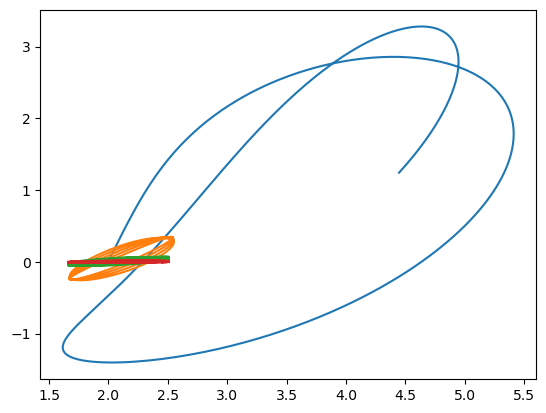

In [123]:
for vz0 in np.geomspace(0.01,1,4)[::-1]:
    state = cm.PhaseSpaceState([R,z,pR,pz],[R0,0.01,0.3,vz0])
    ham = cm.Hamiltonian(Ham,pars_rule,state)
    Nout = 512
    times = np.linspace(0,40,Nout)
    state_arr = np.zeros((Nout,len(ham.state.values)))
    for i,t in enumerate(times):
        ham.integrate(t)
        state_arr[i]=ham.state.values
    plt.plot(state_arr[:,0],state_arr[:,1])

In [201]:
 + [alpha,]

[R, z, p_R, p_z]

    ⎛                               3                        2                         ⎞       ⎛    
    ⎜                            2⋅R  - 2⋅R⋅α + 2⋅R⋅γ + 2⋅R⋅z                          ⎟       ⎜    
p_R⋅⎜R + ──────────────────────────────────────────────────────────────────────────────⎟ + p_z⋅⎜z + 
    ⎜         _________________________________________________________________________⎟       ⎜    
    ⎜        ╱  4      2        2        2  2    2                2    2        2    4 ⎟       ⎜    
    ⎝    2⋅╲╱  R  - 2⋅R ⋅α + 2⋅R ⋅γ + 2⋅R ⋅z  + α  - 2⋅α⋅γ + 2⋅α⋅z  + γ  - 2⋅γ⋅z  + z  ⎠       ⎝    

                           2                        3                         ⎞
                        2⋅R ⋅z + 2⋅α⋅z - 2⋅γ⋅z + 2⋅z                          ⎟
──────────────────────────────────────────────────────────────────────────────⎟
     _________________________________________________________________________⎟
    ╱  4      2        2        2  2    2                2    2        2 

In prolate spheroidal coordinates

In [8]:
plambda

NameError: name 'plambda' is not defined

In [128]:
T = (2/(lmbda-mu))*(alpha+lmbda)*(gamma+lmbda)*plambda*plambda
T+= (2/(mu-lmbda))*(alpha+mu)*(gamma+mu)*pmu*pmu
T+= (alpha-gamma) * L * L / (lmbda+alpha) / (mu+alpha) / 2
T

     2                         2                          2                
    L ⋅(α - γ)      2⋅p_\lambda ⋅(α + λ)⋅(γ + λ)   2⋅p_\mu ⋅(α + μ)⋅(γ + μ)
───────────────── + ──────────────────────────── + ────────────────────────
2⋅(α + λ)⋅(α + μ)              λ - μ                        -λ + μ         

In [176]:
sp.expand(V)

                           ⎛    ________⎞                              ⎛    ________⎞
        ____   _______     ⎜   ╱      λ ⎟           ____   _______     ⎜   ╱      μ ⎟
2⋅π⋅α⋅╲╱ -γ ⋅╲╱ γ + λ ⋅atan⎜  ╱  -1 - ─ ⎟   2⋅π⋅α⋅╲╱ -γ ⋅╲╱ γ + μ ⋅atan⎜  ╱  -1 - ─ ⎟
                           ⎝╲╱        γ ⎠                              ⎝╲╱        γ ⎠
───────────────────────────────────────── - ─────────────────────────────────────────
                  λ - μ                                       λ - μ                  

In [167]:
Hell = T + sp.expand(V)

In [177]:
exprn = (Hell-E)
exprn=exprn.func(*[sp.simplify(a * (lmbda-mu)) for a in exprn.args])

In [178]:
exprn

              2                                              ⎛    ________⎞                         
             L ⋅(α - γ)⋅(λ - μ)           ____   _______     ⎜   ╱ -γ - λ ⎟           ____   _______
E⋅(-λ + μ) + ────────────────── + 2⋅π⋅α⋅╲╱ -γ ⋅╲╱ γ + λ ⋅atan⎜  ╱  ────── ⎟ - 2⋅π⋅α⋅╲╱ -γ ⋅╲╱ γ + μ 
             2⋅(α + λ)⋅(α + μ)                               ⎝╲╱     γ    ⎠                         

     ⎛    ___________⎞                                                          
     ⎜   ╱ -(γ + μ)  ⎟              2                          2                
⋅atan⎜  ╱  ───────── ⎟ + 2⋅p_\lambda ⋅(α + λ)⋅(γ + λ) - 2⋅p_\mu ⋅(α + μ)⋅(γ + μ)
     ⎝╲╱       γ     ⎠                                                          

In [183]:
exprn.args

⎛                                                                      2                            
⎜                    2                             2                  L ⋅(α - γ)⋅(λ - μ)           _
⎜E⋅(-λ + μ), -2⋅p_\mu ⋅(α + μ)⋅(γ + μ), 2⋅p_\lambda ⋅(α + λ)⋅(γ + λ), ──────────────────, -2⋅π⋅α⋅╲╱ 
⎝                                                                     2⋅(α + λ)⋅(α + μ)             

                  ⎛    ___________⎞                             ⎛    ________⎞⎞
___   _______     ⎜   ╱ -(γ + μ)  ⎟          ____   _______     ⎜   ╱ -γ - λ ⎟⎟
-γ ⋅╲╱ γ + μ ⋅atan⎜  ╱  ───────── ⎟, 2⋅π⋅α⋅╲╱ -γ ⋅╲╱ γ + λ ⋅atan⎜  ╱  ────── ⎟⎟
                  ⎝╲╱       γ     ⎠                             ⎝╲╱     γ    ⎠⎠

In [184]:
exprn=exprn.xreplace({exprn.args[-3]:L*L*(lmbda+gamma)/(lmbda+alpha)/2 - L*L*(mu+gamma)/(mu+alpha)/ 2})

In [185]:
exprn

              2            2                                      ⎛    ________⎞                    
             L ⋅(γ + μ)   L ⋅(γ + λ)           ____   _______     ⎜   ╱ -γ - λ ⎟           ____   __
E⋅(-λ + μ) - ────────── + ────────── + 2⋅π⋅α⋅╲╱ -γ ⋅╲╱ γ + λ ⋅atan⎜  ╱  ────── ⎟ - 2⋅π⋅α⋅╲╱ -γ ⋅╲╱ γ
             2⋅(α + μ)    2⋅(α + λ)                               ⎝╲╱     γ    ⎠                    

          ⎛    ___________⎞                                                          
_____     ⎜   ╱ -(γ + μ)  ⎟              2                          2                
 + μ ⋅atan⎜  ╱  ───────── ⎟ + 2⋅p_\lambda ⋅(α + λ)⋅(γ + λ) - 2⋅p_\mu ⋅(α + μ)⋅(γ + μ)
          ⎝╲╱       γ     ⎠                                                          

In [189]:
term1 = exprn.func(*[a for a in exprn.args if mu not in a.free_symbols])


In [190]:

term2 = exprn.func(*[a for a in exprn.args if lmbda not in a.free_symbols])

In [218]:
sp.simplify((term1 - lmbda * E) +  - exprn)

0

In [220]:
Iexprn_lmbda = (term1 - lmbda * E) 
Iexprn_lmbda_polar = Iexprn.xreplace(ell_2_polar)

Iexprn_mu = -1 * (term2 + mu * E)
Iexprn_mu_polar = Iexprn.xreplace(ell_2_polar)


In [221]:
Iexprn_mu

        2                                      ⎛    ___________⎞                           
       L ⋅(γ + μ)           ____   _______     ⎜   ╱ -(γ + μ)  ⎟          2                
-E⋅μ + ────────── + 2⋅π⋅α⋅╲╱ -γ ⋅╲╱ γ + μ ⋅atan⎜  ╱  ───────── ⎟ + 2⋅p_\mu ⋅(α + μ)⋅(γ + μ)
       2⋅(α + μ)                               ⎝╲╱       γ     ⎠                           

In [222]:
I_lmbda_func = sp.lambdify(ham.qp_vars,Iexprn_lmbda_polar.xreplace(ham.H_params).xreplace({E:ham.calculate_energy()}))
I_mu_func = sp.lambdify(ham.qp_vars,Iexprn_mu_polar.xreplace(ham.H_params).xreplace({E:ham.calculate_energy()}))

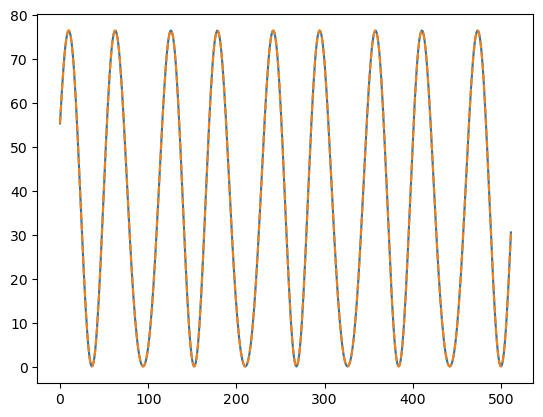

In [225]:
plt.plot(I_lmbda_func(*state_arr.T))
plt.plot(I_mu_func(*state_arr.T),'--')

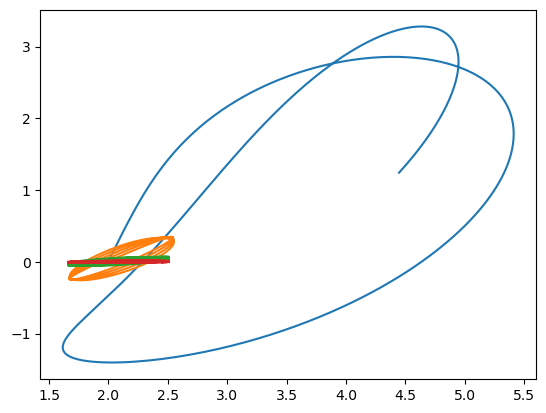

In [123]:
for vz0 in np.geomspace(0.01,1,4)[::-1]:
    state = cm.PhaseSpaceState([R,z,pR,pz],[R0,0.01,0.3,vz0])
    ham = cm.Hamiltonian(Ham,pars_rule,state)
    Nout = 512
    times = np.linspace(0,40,Nout)
    state_arr = np.zeros((Nout,len(ham.state.values)))
    for i,t in enumerate(times):
        ham.integrate(t)
        state_arr[i]=ham.state.values
    plt.plot(state_arr[:,0],state_arr[:,1])